# Graveyard Of Wikidata - Cluster

Github : https://github.com/haikelJebahi/Graveyard-of-wikidata

Data : https://iccl.inf.tu-dresden.de/web/Wikidata_SPARQL_Logs/en

## Imports

In [15]:
%matplotlib inline
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote_plus
from collections import Counter
import seaborn as sns
from sklearn.cluster import KMeans
import colorcet as cc
from sklearn.cluster import AgglomerativeClustering

In [16]:
pd.set_option("display.max_rows", 0)
pd.set_option("display.max_columns", 0)
pd.set_option("display.expand_frame_repr", True)
pd.set_option("display.max_colwidth", -1)

/var/folders/lm/zh_hww991gd26t0d10kfp2km0000gn/T/ipykernel_99197/3536214460.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [17]:
# see parse.py
def encoded2raw(encoded):
    str = unquote_plus(encoded)
    str = re.sub(r"> *\*", ">*", str)
    str = re.sub(r"> *\+", ">+", str)
    str = re.sub(r"> *\?([^v])", r">?\1", str)
    return str


## Analyse with PCA/TSNE

In [18]:
features = load("../data/pca/pca_features.joblib")
df_sample = pd.read_csv("../data/sample/status500_Joined.parsed.sample.tsv", sep="\t")
tsne_2_results = load("../data/tsne/tsne.joblib")

### Kmeans clustering

In [19]:
kmeans = dict()

for i in range(1,20):
    print("Clustering for n_clusters=" + str(i))
    kmeans[i] = KMeans(n_clusters=i, random_state=0).fit(tsne_2_results)

Clustering for n_clusters=1
Clustering for n_clusters=2
Clustering for n_clusters=3
Clustering for n_clusters=4
Clustering for n_clusters=5
Clustering for n_clusters=6
Clustering for n_clusters=7
Clustering for n_clusters=8
Clustering for n_clusters=9
Clustering for n_clusters=10
Clustering for n_clusters=11
Clustering for n_clusters=12
Clustering for n_clusters=13
Clustering for n_clusters=14
Clustering for n_clusters=15
Clustering for n_clusters=16
Clustering for n_clusters=17
Clustering for n_clusters=18
Clustering for n_clusters=19


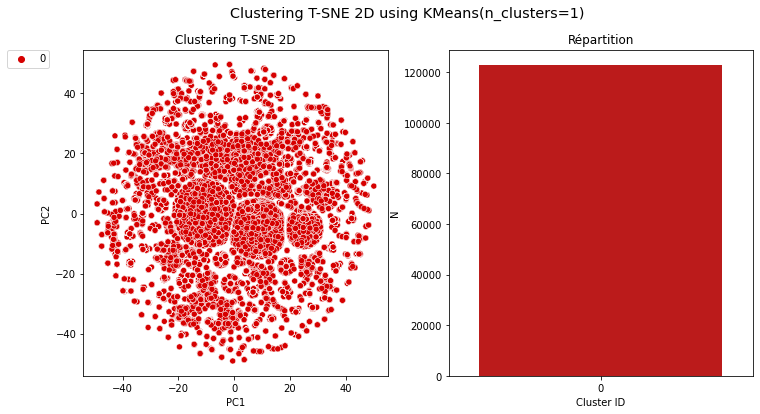

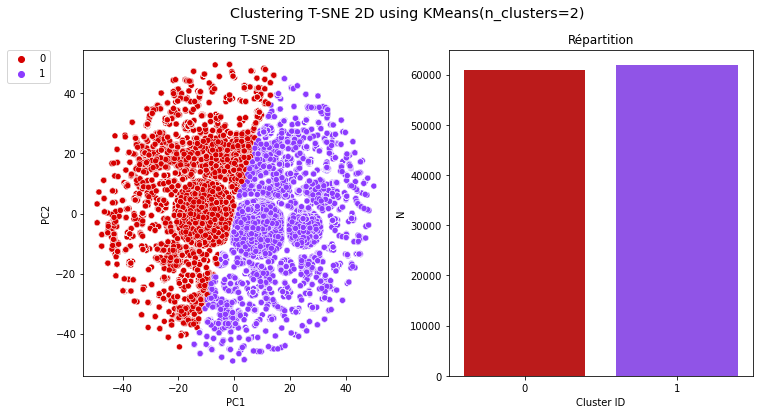

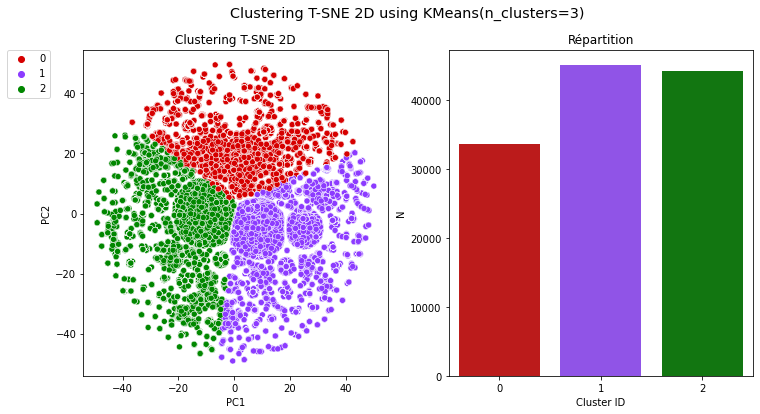

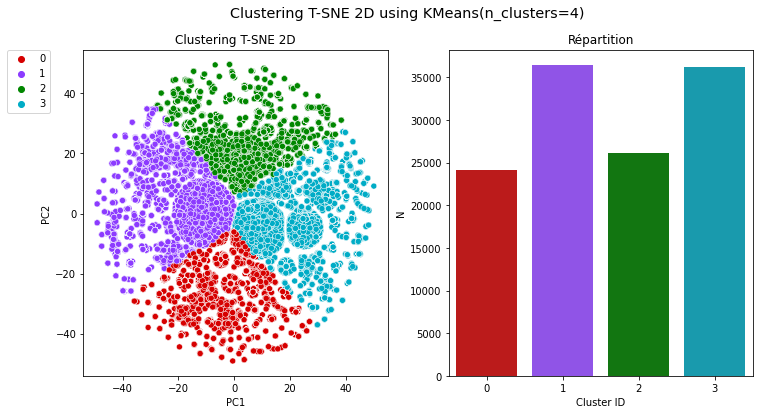

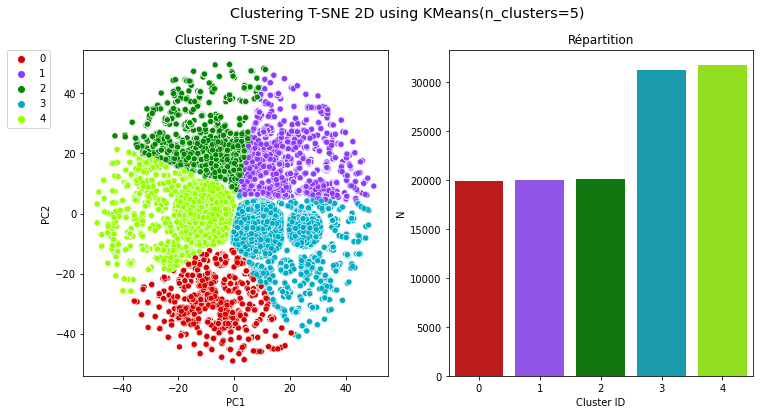

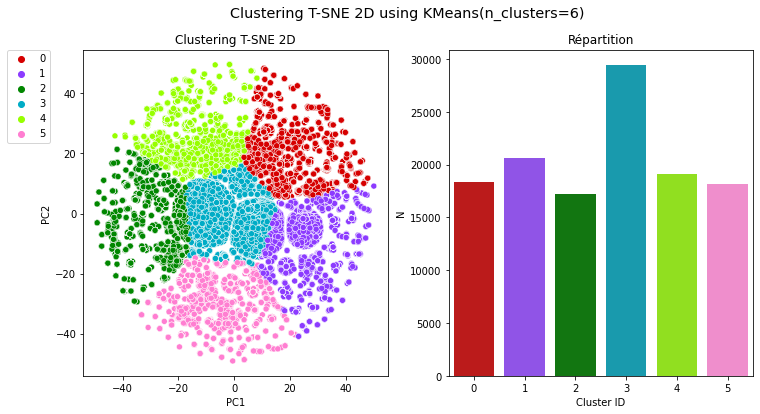

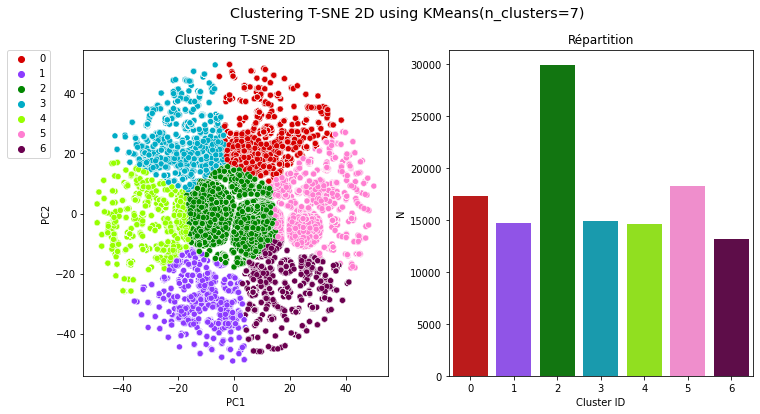

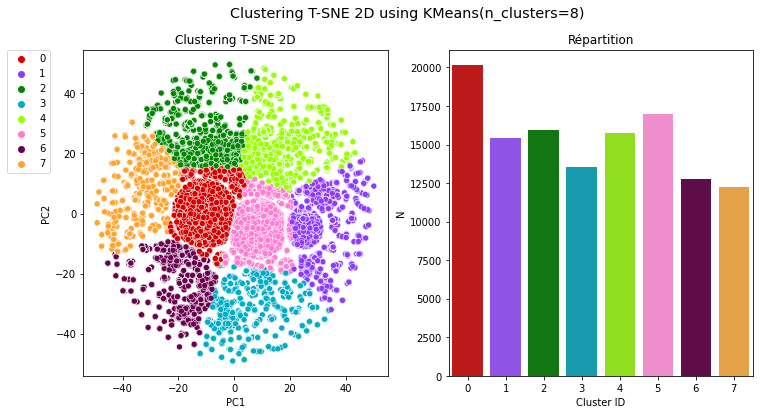

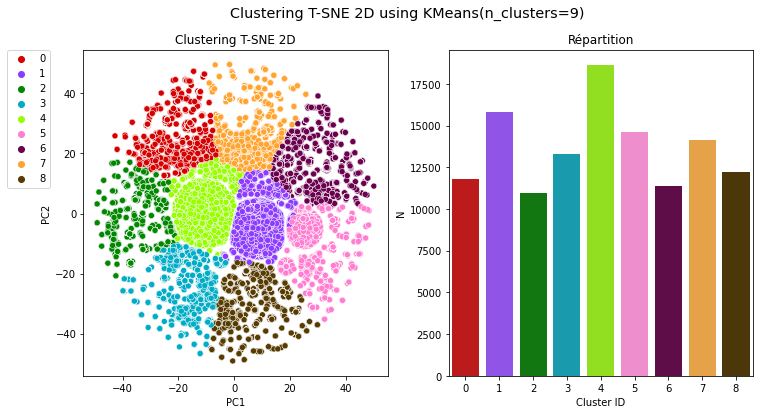

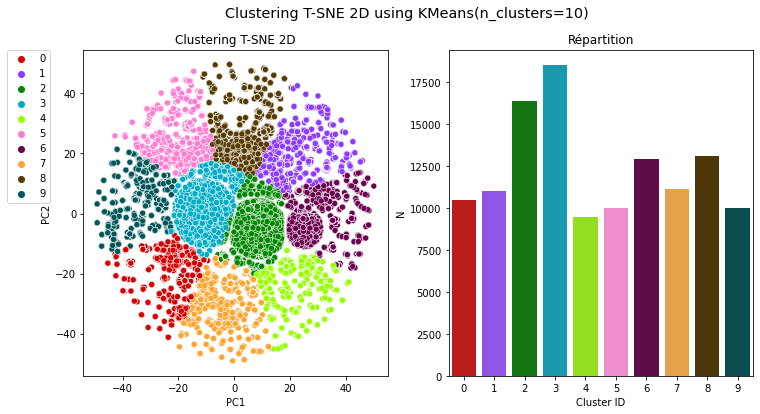

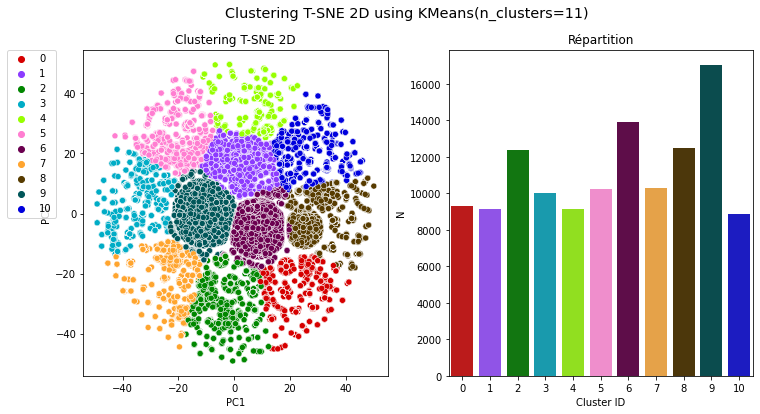

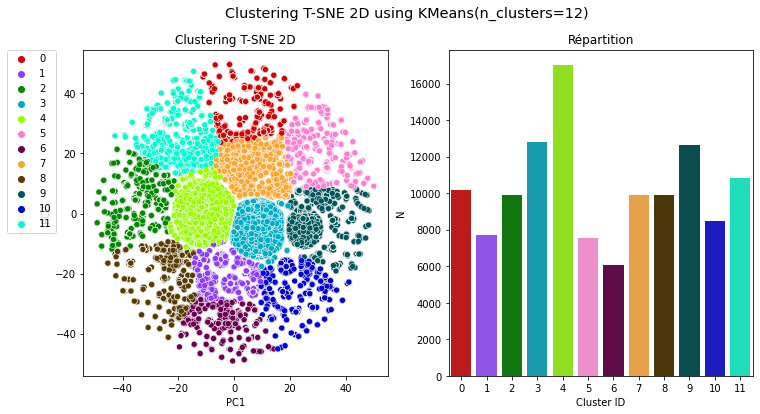

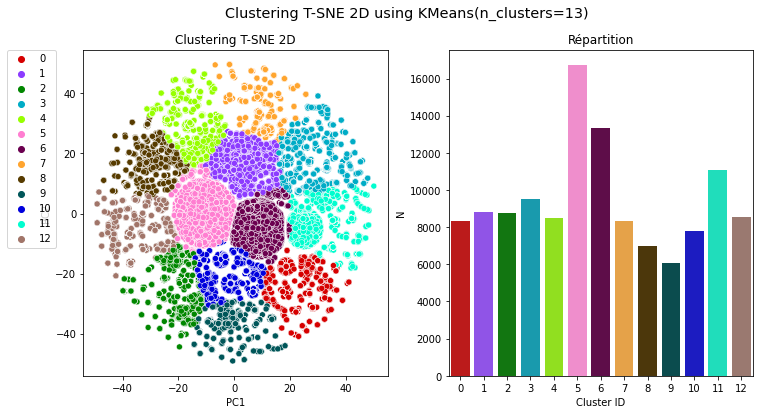

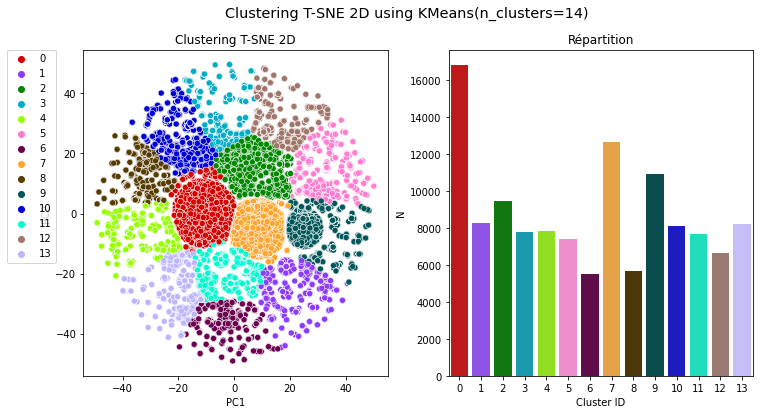

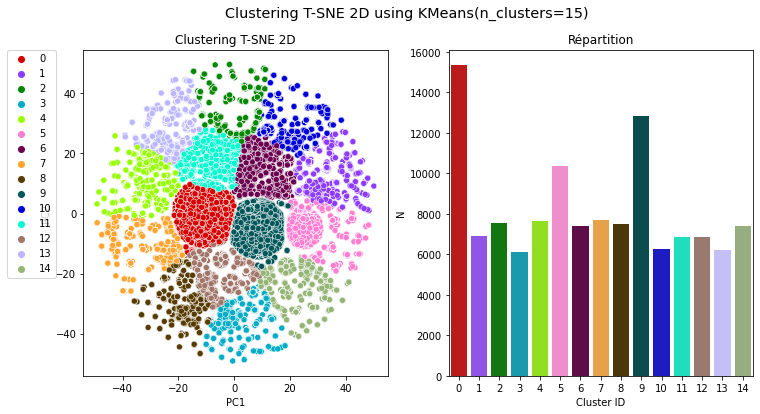

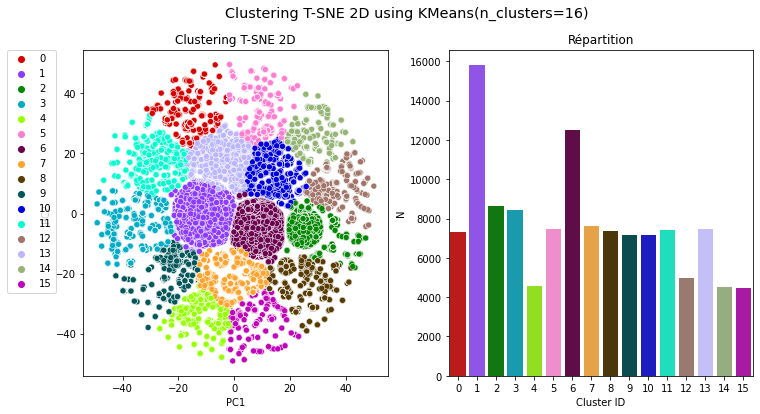

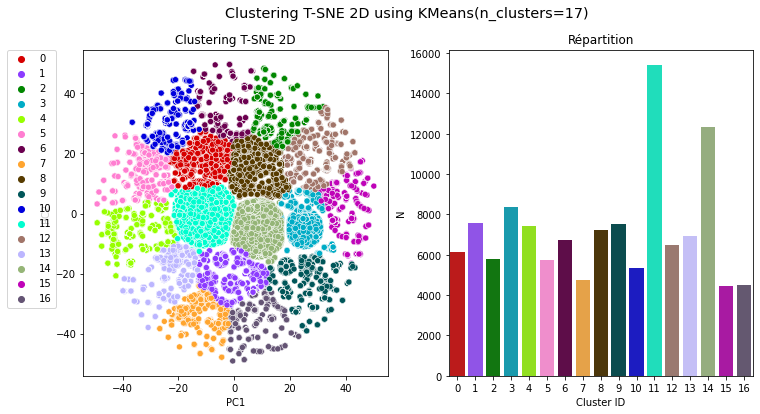

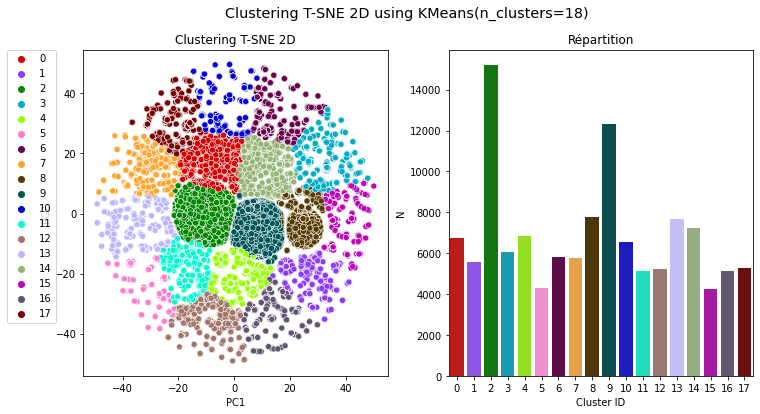

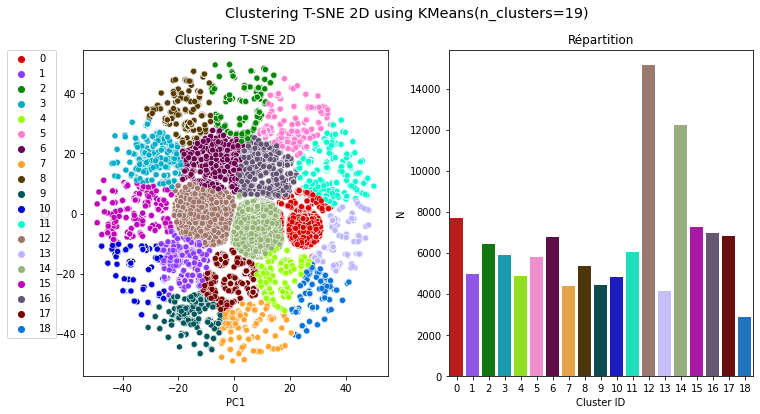

In [20]:
for keys in kmeans.keys():
    labels = kmeans[keys].labels_
    counter = Counter(labels)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    # Plot title
    st = fig.suptitle("Clustering T-SNE 2D using KMeans(n_clusters=" + str(keys) + ")", fontsize="x-large")
    palette = sns.color_palette(cc.glasbey, n_colors=len(counter.keys()))

    # Scatterplot
    sns\
        .scatterplot(x=tsne_2_results[:, 0], y=tsne_2_results[:, 1], hue=labels.astype(int), ax=ax1,legend='full', palette=palette)\
        .set(title="Clustering T-SNE 2D", xlabel="PC1", ylabel="PC2")
    ax1.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

    # Bar plot
    sns\
        .barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax2,  palette=palette)\
        .set(title="Répartition", xlabel="Cluster ID", ylabel="N")
    
    # show
    plt.show()

### Ward hierarchical clustering

In [21]:
%%script false --no-raise-error # disable cell

wards = dict()

for i in range(1,25):
    print("Clustering for n_clusters=" + str(i))
    wards[i] = AgglomerativeClustering(n_clusters=i, linkage="ward").fit(tsne_2_results)

In [22]:
%%script false --no-raise-error # disable cell

for keys in wards.keys():
    labels = wards[keys].labels_
    counter = Counter(labels)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))
    # Plot title
    st = fig.suptitle("Clustering T-SNE 2D using Wards (n_clusters=" + str(keys) + ")", fontsize="x-large")
    palette = sns.color_palette(cc.glasbey, n_colors=len(counter.keys()))

    # Scatterplot
    labels = wards[keys].labels_
    sns\
        .scatterplot(x=tsne_2_results[:, 0], y=tsne_2_results[:, 1], hue=labels.astype(int), ax=ax1,legend='full', palette=palette)\
        .set(title="Clustering T-SNE 2D", xlabel="PC1", ylabel="PC2")
    ax1.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

    # Bar plot
    counter = Counter(labels)
    sns\
        .barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax2,  palette=palette)\
        .set(title="Répartition", xlabel="Cluster ID", ylabel="N")
    
    # show
    plt.show()


### Analyse

Add cluster to dataframe

In [23]:
labels = kmeans[14].labels_ # <-- change me

df_sample_with_cluster = df_sample.copy()
df_sample_with_cluster["cluster_id"] = labels
df_sample_with_cluster

,anonymizedQuery,timestamp,sourceCategory,user_agent,var_cpt,filter,orderby,limit,select,distinct,join,project,tomultiset,union,modify,bgp,values,groupBy,slice,triples,offset,extend,filter_not_exists,leftJoin,minus,notexist,sample,count,having,pathWithStar,pathWithPlus,pathWithQuestionMark,pathWithInv,pathWithSequence,pathWithAlternative,complexPathWith,simplePathWith,file_path,interval,cluster_id
0,SELECT+DISTINCT+%3Fvar1+%0AWHERE+%7B%0A++%3Fvar1++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP3373%3E++%3Fvar2+.%0A++MINUS+++%7B%0A++++%3Fvar2+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2FP3373%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fstatement%2FP3373%3E+%2F+%3Chttp%3A%2F%2Fwww.w3.org%2F2002%2F07%2Fowl%23sameAs%3E+%3F%29+%3Fvar1+.%0A++%7D%0A++%3Fvar2++%3Fvar3++%3Fvar4+.%0A++%3Fvar1++%3Fvar3++%3Fvar4+.%0A+FILTER+%28++%28++%3Fvar3++IN+%28++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP22%3E+%2C+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP25%3E++%29++%29+%0A%29+.%0A%7D%0A,2017-08-16 14:37:50,robotic,UNKNOWN,4,1,0,0,1,1,2,1,0,0,0,3,0,0,0,4,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,data/parsed/I3_status500_Joined.parsed.tsv,3,11
1,SELECT+%3Fvar1++%3Fvar2++%3Fvar3+%0AWHERE+%7B%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ1190554%3E+.%0A++%3Fvar1++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP585%3E++%3Fvar2+.%0A++%3Fvar3++%3Chttp%3A%2F%2Fschema.org%2Fabout%3E++%3Fvar1+.%0A++%3Fvar3++%3Chttp%3A%2F%2Fschema.org%2FisPartOf%3E++%3Chttps%3A%2F%2Fen.wikipedia.org%2F%3E+.%0A+FILTER+%28++%28+%28++DATATYPE+%28++%3Fvar2++%29++%3D++%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23dateTime%3E++%29+%26%26+%28++MONTH+%28++%3Fvar2++%29++%3D++MONTH+%28++NOW+%28++%29++%29++%29+%26%26+%28++DAY+%28++%3Fvar2++%29++%3D++DAY+%28++NOW+%28++%29++%29++%29+%29+%0A%29+.%0A%7D%0AORDER+BY++DESC%28+%3Fvar2+%29%0ALIMIT+5%0A,2018-02-04 05:04:44,robotic,UNKNOWN,3,1,1,5,1,0,3,1,0,0,0,1,0,0,1,4,0,0,0,0,0,0,0,0,3,1,0,0,0,1,0,1,1,data/parsed/I6_status500_Joined.parsed.tsv,6,7
2,SELECT+%3Fvar1+%28+COUNT+%28+%3Fvar2++%29+AS++%3Fvar3++%29%0AWHERE+%7B%0A++%3Fvar2++%3Fvar1++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ142%3E+.%0A+OPTIONAL+%7B%0A++%3Fvar2++%3Chttp%3A%2F%2Fwww.w3.org%2F2000%2F01%2Frdf-schema%23label%3E++%3Fvar4+.%0A+FILTER+%28++%28+%28++LANG+%28++%3Fvar4++%29++%3D++%22en%22+%29+%29+%0A%29+.%0A+%7D%0A%7D%0AGROUP+BY++%3Fvar1+%0A+HAVING++%28+%28++%3Fvar3++%3E+%221%22%5E%5E%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23integer%3E++%29+%29+%0A+ORDER+BY++DESC%28+%3Fvar3+%29%0A,2018-01-27 18:27:09,organic,browser,6,1,1,0,1,0,0,1,0,0,0,2,0,1,0,2,0,2,0,1,0,0,1,0,2,0,0,0,0,0,0,0,0,data/parsed/I5_status500_Joined.parsed.tsv,5,13
3,SELECT%28++%3Fvar1++AS++%3Fvar2++%29%0AWHERE+%7B%0A++%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ4138%3E+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP131%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP131%3E+*%29+%3Fvar3+.%0A++%3Fvar3+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ10864048%3E+.%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP131%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP131%3E+*%29+%3Fvar3+.%0A++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ13220204%3E+.%0A+SERVICE++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23label%3E+++%7B%0A++++%3Chttp%3A%2F%2Fwww.bigdata.com%2Frdf%23serviceParam%3E++%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23language%3E++%22fi%22.%0A++%7D%0A+FILTER+%28++%28++NOT+EXISTS++%7B%0A+++%3Fvar1+%28+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP31%3E+%2F+%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2FP279%3E+*%29+%3Chttp%3A%2F%2Fww

##### Per query

group by cluster

In [24]:
dict_df_by_cluster = dict()
cluster_ids = df_sample_with_cluster["cluster_id"].unique()

for cluster_id in cluster_ids:
    dict_df_by_cluster[cluster_id] = df_sample_with_cluster[df_sample_with_cluster["cluster_id"]==cluster_id]

In [25]:
n_query_per_cluster = 2

for cluster_id in dict_df_by_cluster.keys():
    subset = dict_df_by_cluster[cluster_id].sample(n=n_query_per_cluster, random_state=0, replace=True)
    for index, row in subset.iterrows():
        print("Cluster ID  = " + str(cluster_id) + ", index = " + str(index))
        print("---- QUERY BEGIN ----")
        print(encoded2raw(row["anonymizedQuery"]))
        print("---- QUERY END ----")
        print()

Cluster ID  = 11, index = 43224
---- QUERY BEGIN ----
SELECT DISTINCT ?var1 
WHERE {
  BIND (  (  NOW (  ) - ?var2  )  AS  ?var3 ).
  ?var1  <http://www.wikidata.org/prop/direct/P570>  ?var2 .
 FILTER (  ( (  ?var3  >= "0"^^<http://www.w3.org/2001/XMLSchema#integer>  ) && (  ?var3  <= "5"^^<http://www.w3.org/2001/XMLSchema#integer>  ) ) 
) .
  ?var4  <http://schema.org/about>  ?var1 .
  ?var4  <http://schema.org/inLanguage>  "es".
  ?var4  <http://schema.org/isPartOf>  <https://es.wikipedia.org/> .
}

---- QUERY END ----

Cluster ID  = 11, index = 41148
---- QUERY BEGIN ----
SELECT ?var1  ?var2  ?var3  ?var4  ?var5 
WHERE {
  <http://www.wikidata.org/entity/Q946034>  ?var1  ?var2 .
  ?var4  ?var3  ?var2 .
  ?var4  ?var5  <http://www.wikidata.org/entity/Q30> .
 FILTER (  (  STRSTARTS (  STR (  ?var1  ) , "string1" )  ) 
) .
 FILTER (  (  STRSTARTS (  STR (  ?var2  ) , "string2" )  ) 
) .
 FILTER (  (  STRSTARTS (  STR (  ?var3  ) , "string1" )  ) 
) .
 FILTER (  (  STRSTARTS (  STR (  ?

##### Plot

Calculate color palette

In [26]:
n_colors = df_sample_with_cluster["cluster_id"].max() + 1
palette = sns.color_palette(cc.glasbey, n_colors=n_colors)

Plot

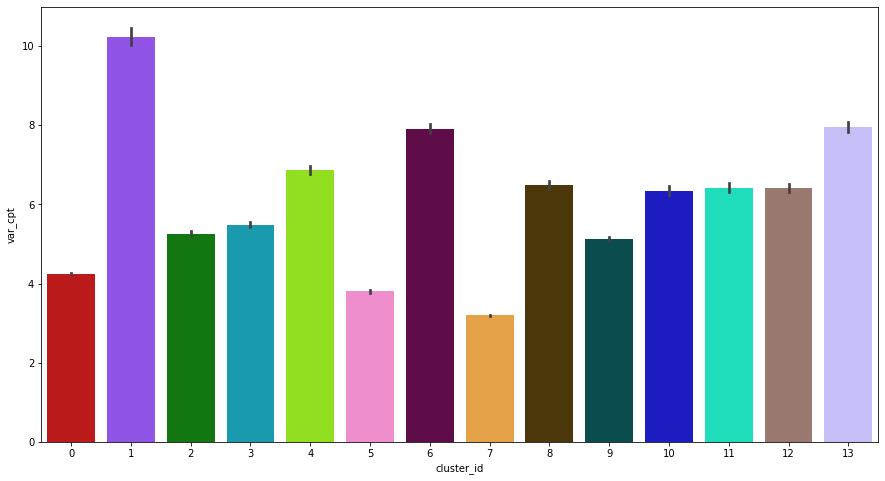

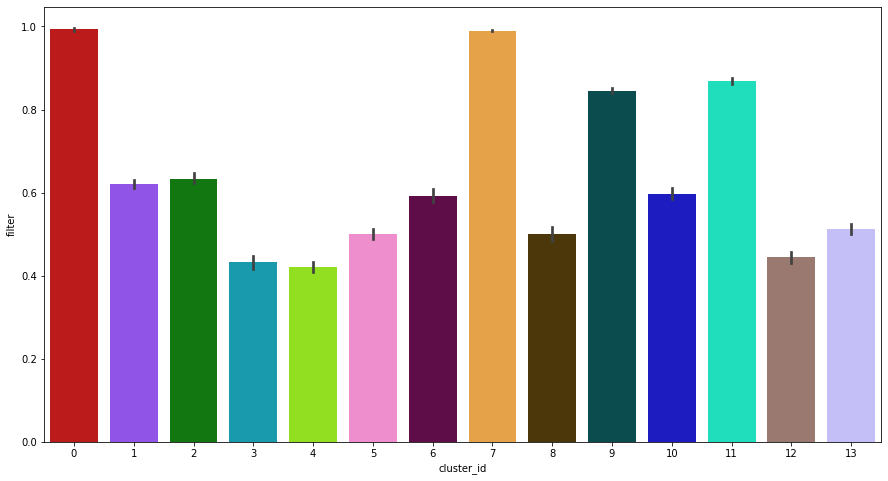

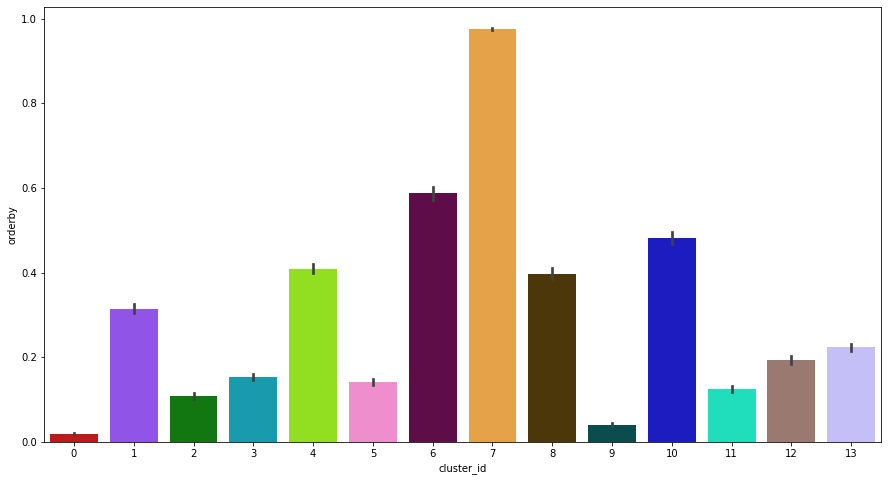

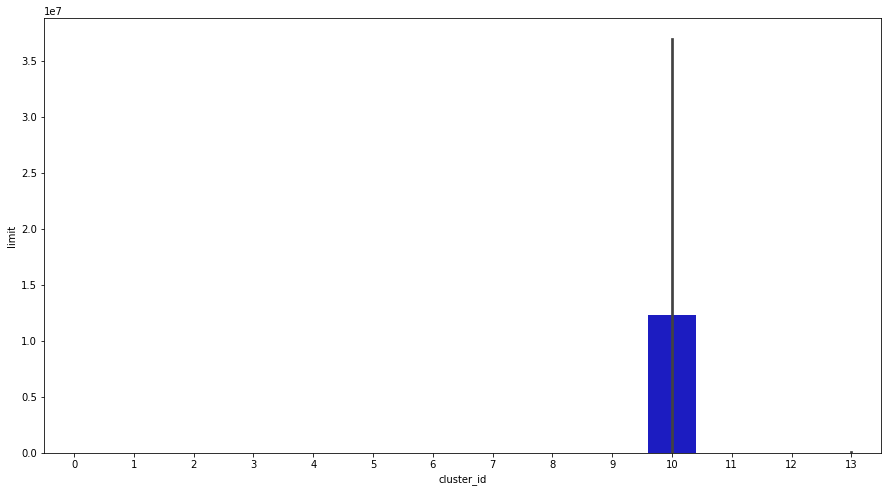

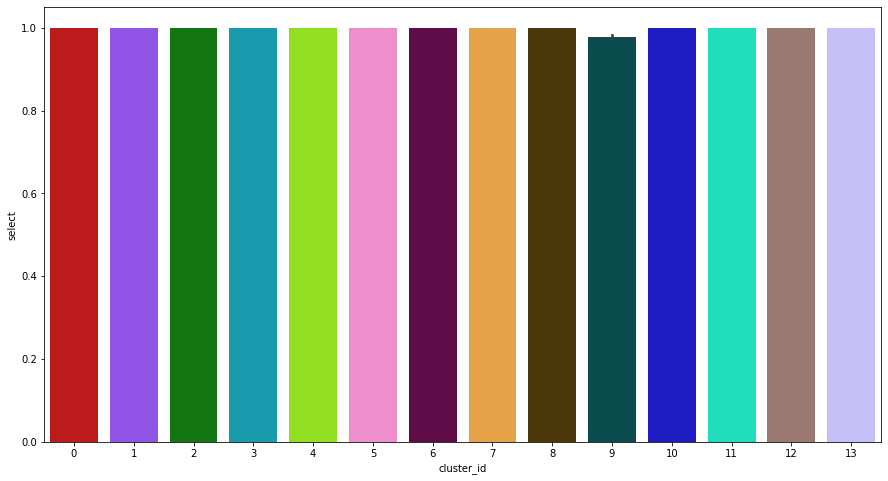

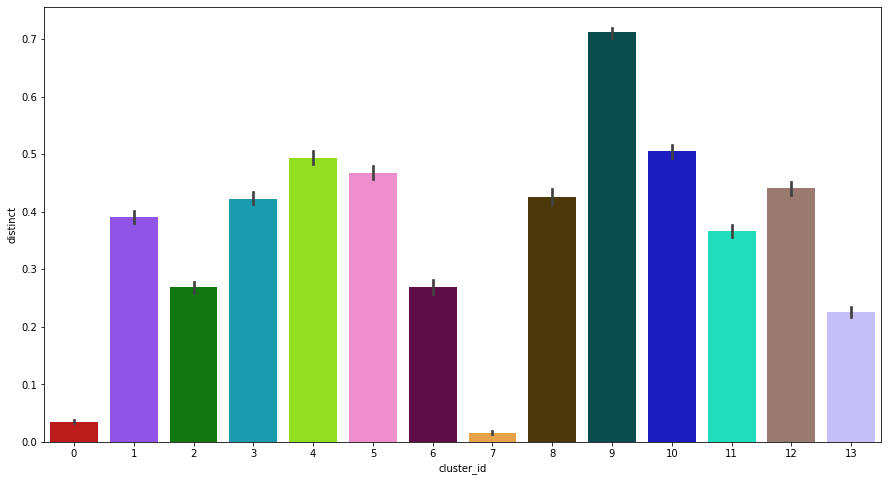

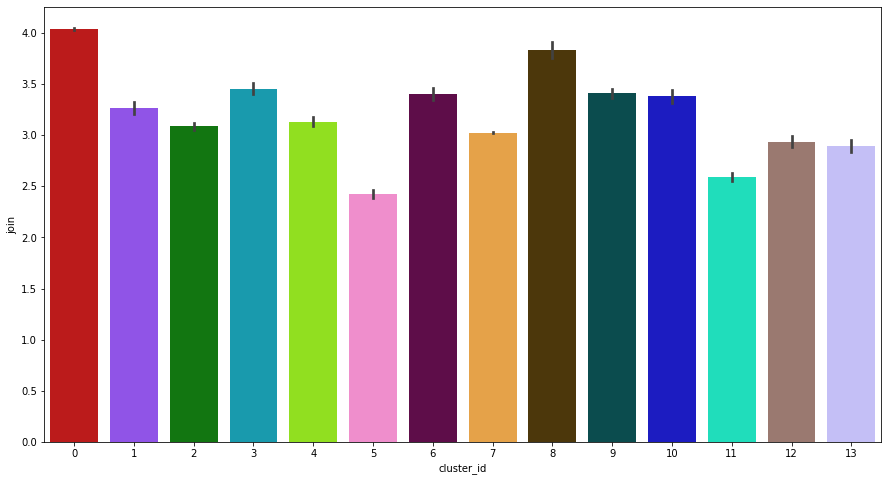

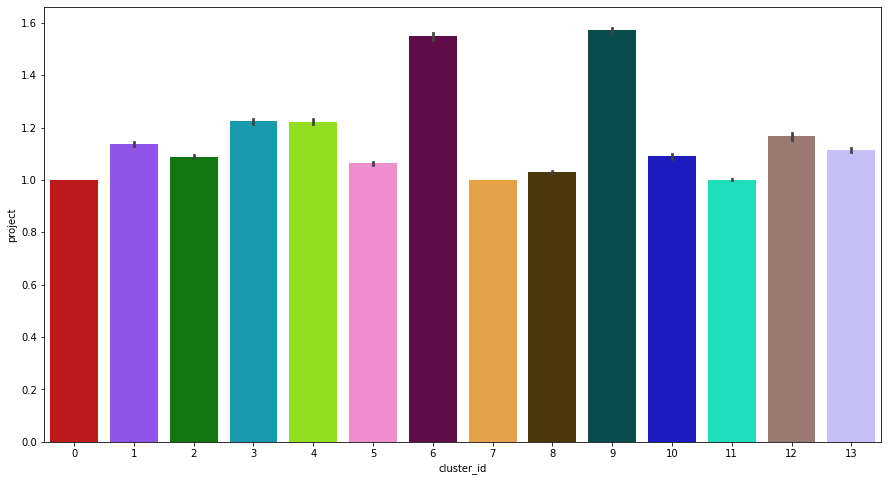

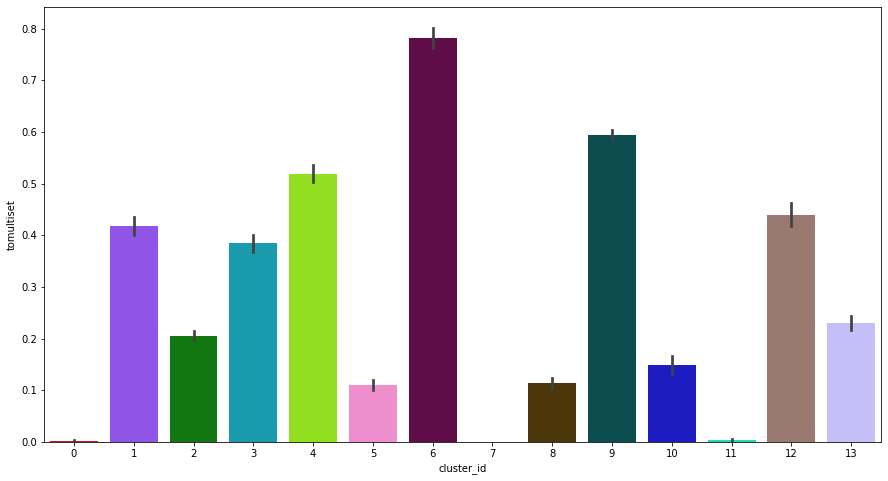

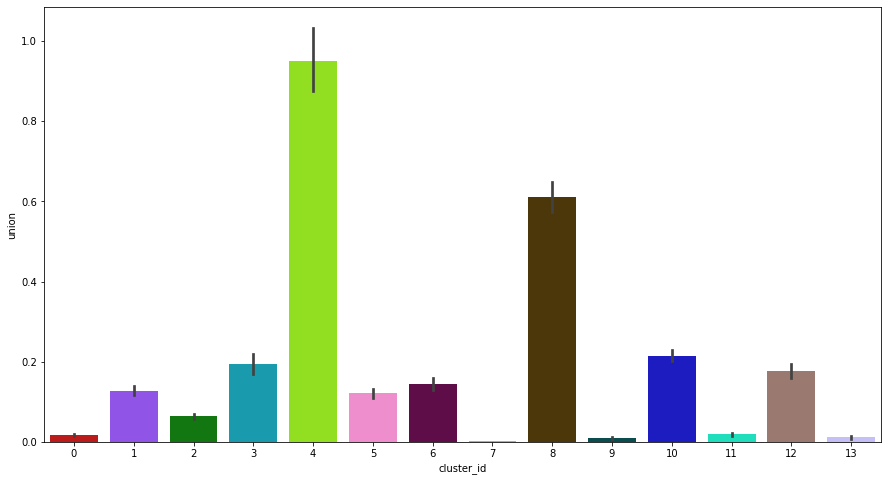

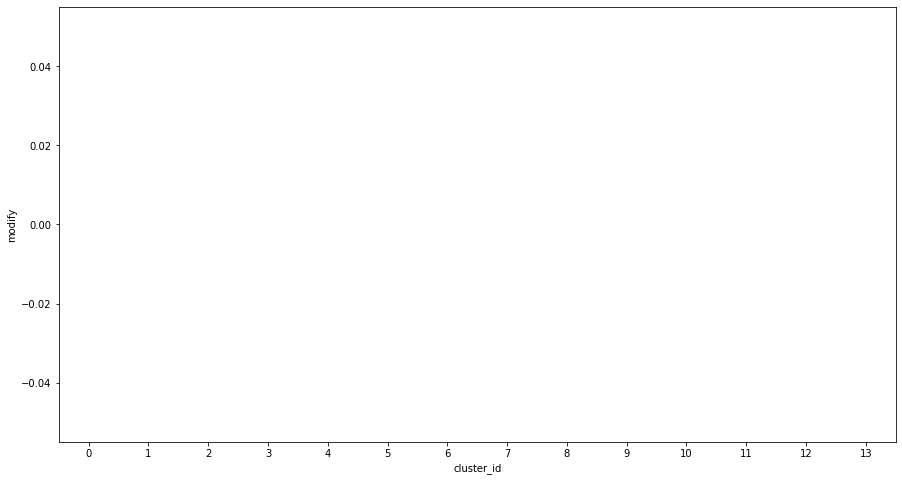

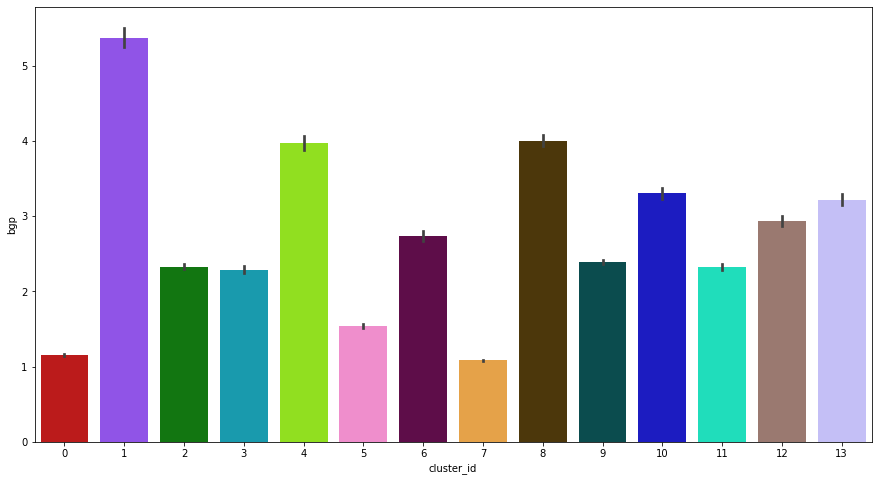

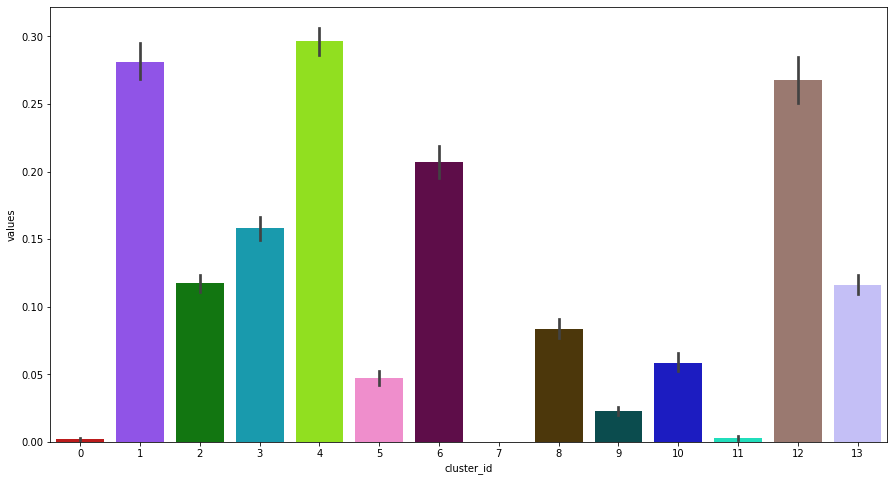

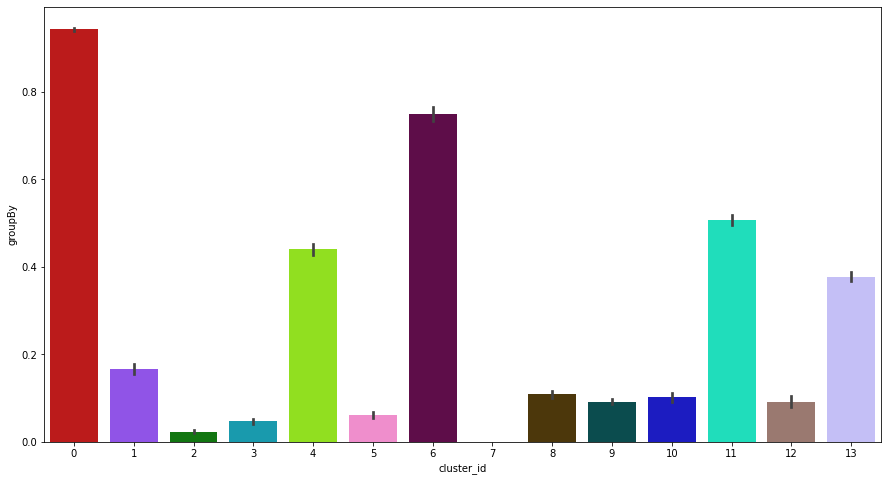

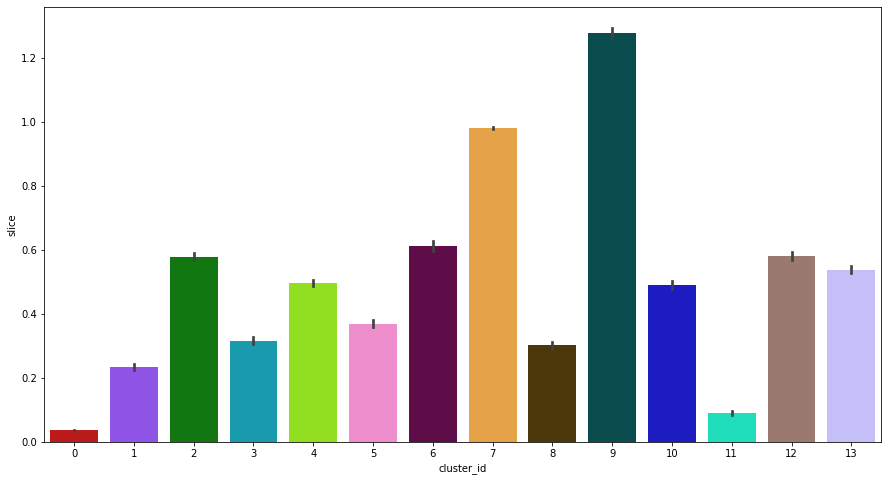

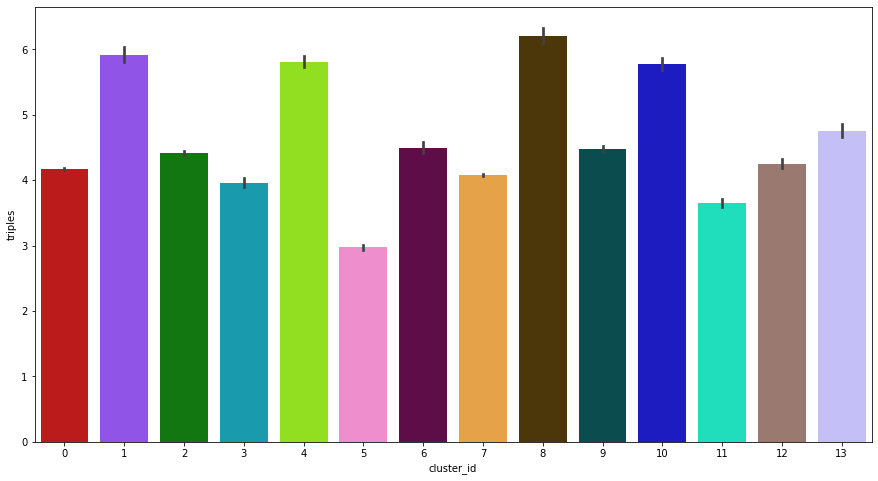

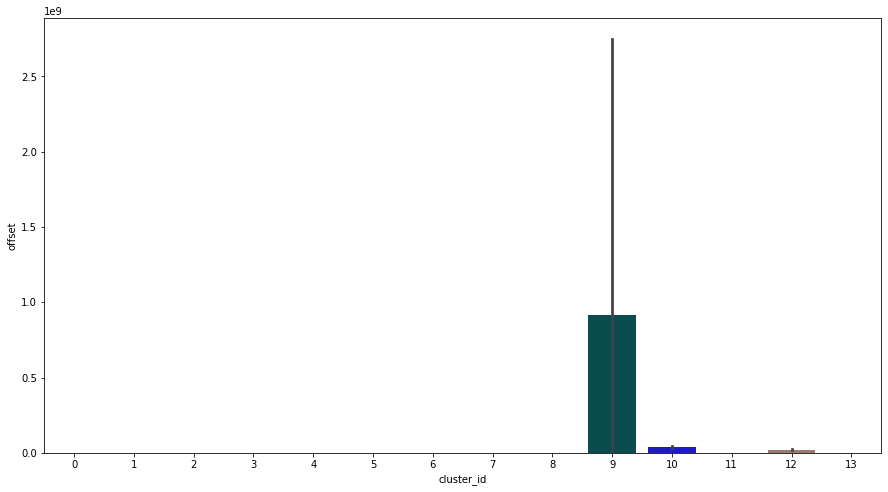

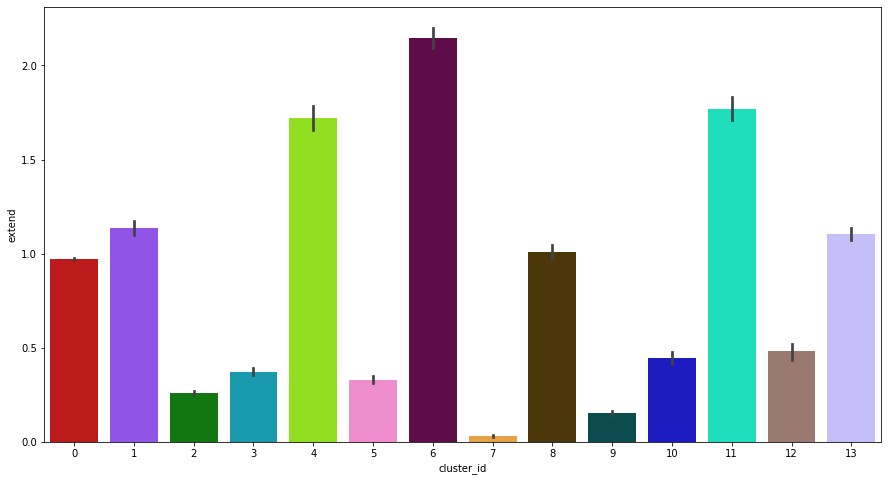

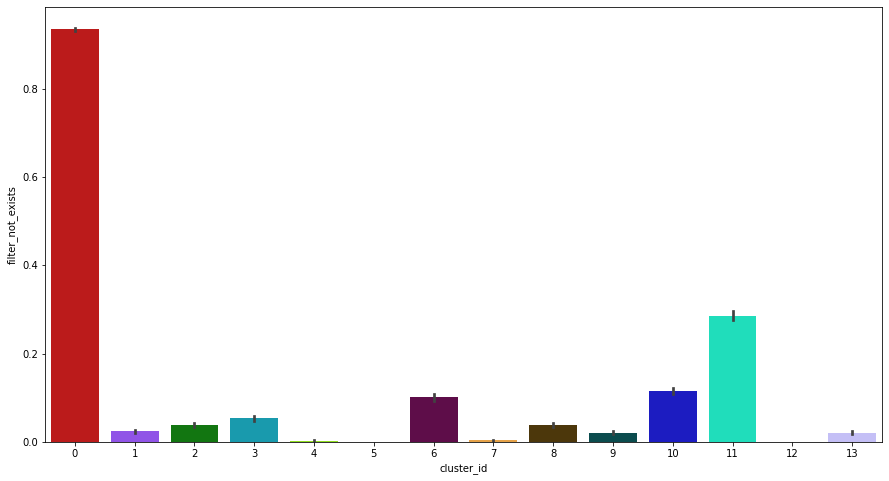

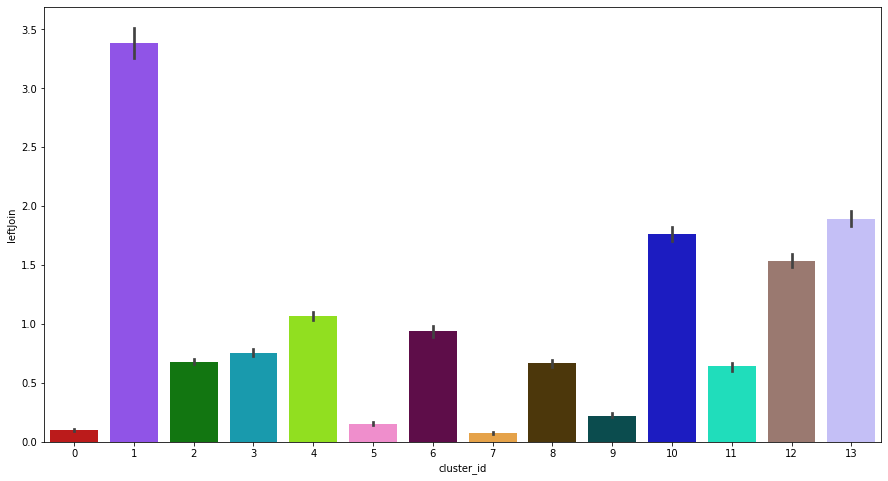

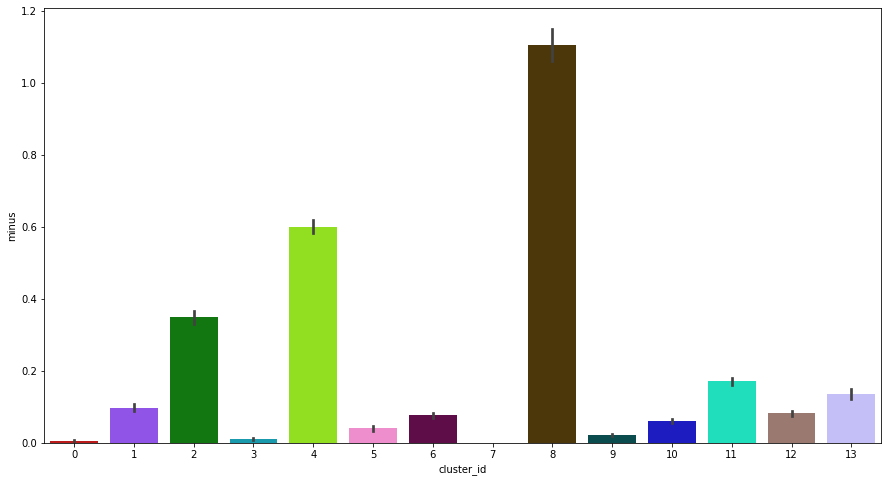

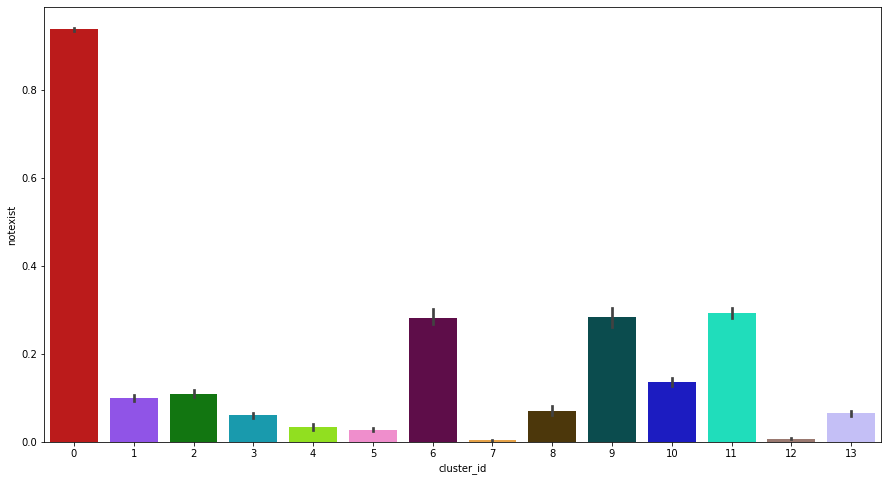

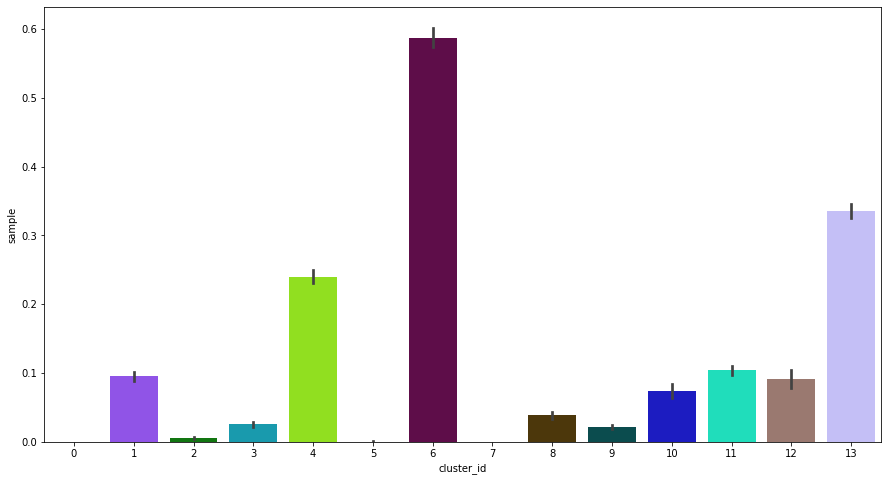

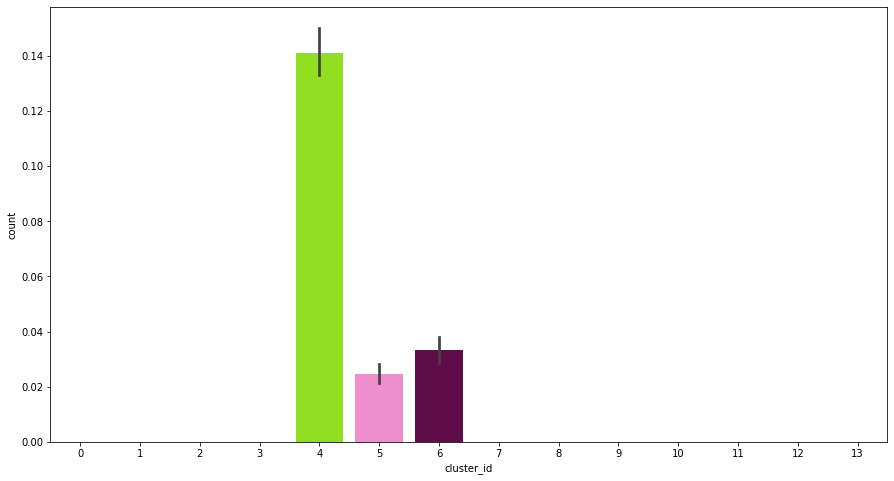

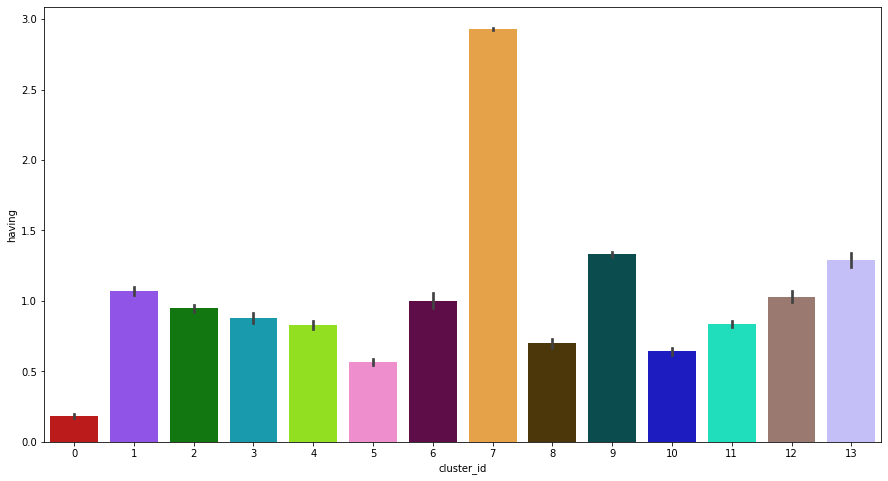

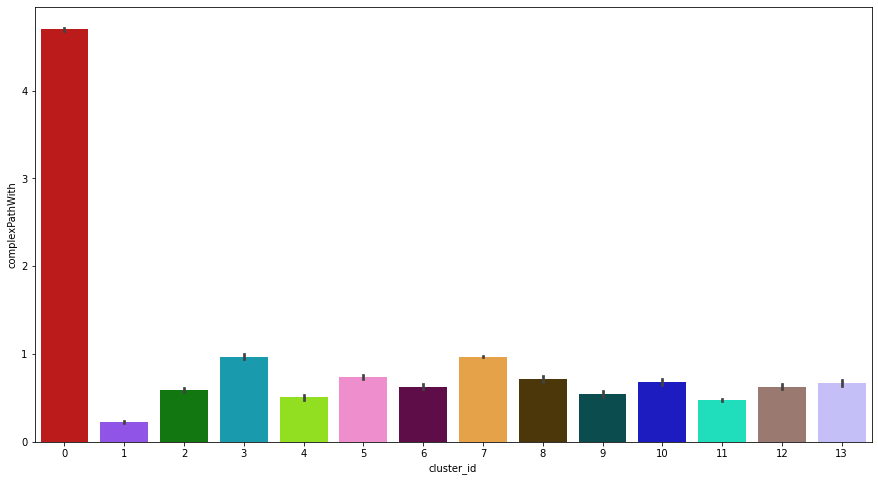

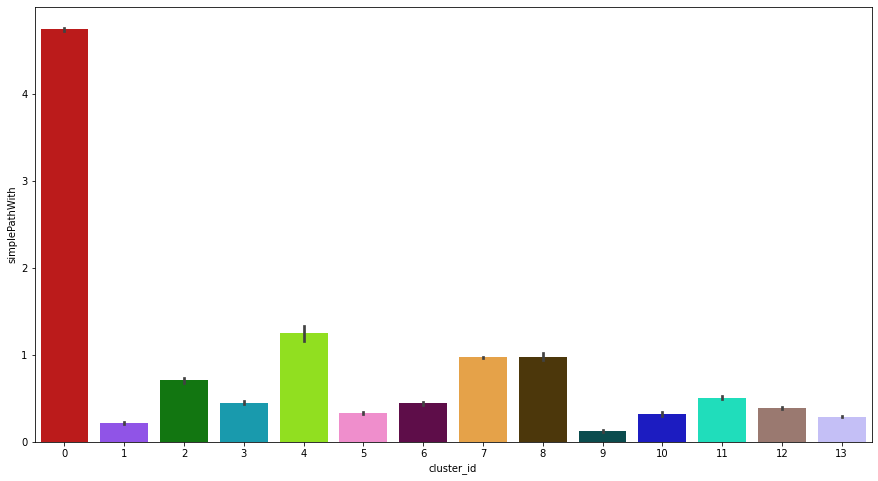

In [27]:
for feature in features:
     plt.figure(figsize=(15,8))
#   #sns.boxplot(
     sns.barplot(
     x="cluster_id"
     , y=feature
     , data=df_sample_with_cluster
     , palette=palette
     #, whis=1000
     )
     plt.show()
